In [11]:
# Import all the libraries needed 

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *
from xclim.core.calendar import percentile_doy
from xclim.indices import tx10p


In [16]:
data = xr.open_dataset('/home/posiden/Documents/Datasets/era5/india.1960.1990.nc')


In [13]:
print(data)

<xarray.Dataset>
Dimensions:    (time: 10957, bnds: 2, longitude: 161, latitude: 141)
Coordinates:
  * time       (time) datetime64[ns] 1961-01-01T11:00:00 ... 1990-12-31T11:00:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 5.75 5.5 5.25 5.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Aug 10 10:42:11 2023: cdo sellonlatbox,60,100,5,40 land...
    frequency:    day
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...


In [14]:
from xclim.core.calendar import percentile_doy
from xclim.indices import tx10p

# Assuming the variable 'data' holds your xarray.Dataset
data = data.rename_vars({"t2m": "tasmax"})  # Renaming 't2m' to 'tasmax'

# Calculate the 10th percentile for each day of the year with a 5-day window
tasmax_per = percentile_doy(data['tasmax'], per=10, window=5).sel(percentiles=10)

# Calculate the tx10p index (number of days with tasmax below the 10th percentile)
cold_days = tx10p(data['tasmax'], tasmax_per)

# You can now work with cold_days, e.g., save it to a file or plot it
cold_days.to_netcdf('tx10p_index.nc')


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

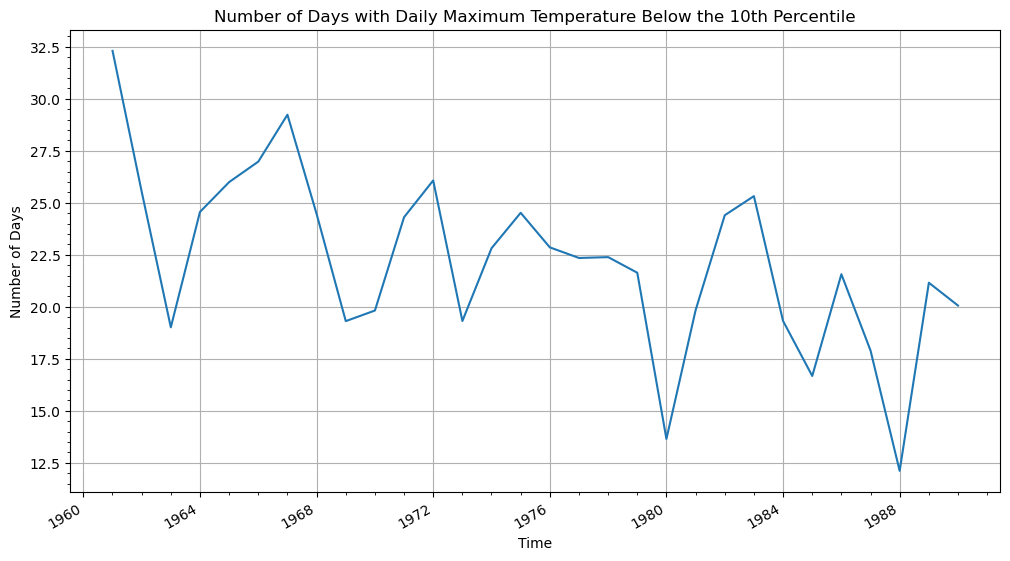

In [19]:
import matplotlib.pyplot as plt

# Assuming 'cold_days' is the variable containing the tx10p index
cold_days_mean = cold_days.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
cold_days_mean.plot()
plt.title('Number of Days with Daily Maximum Temperature Below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


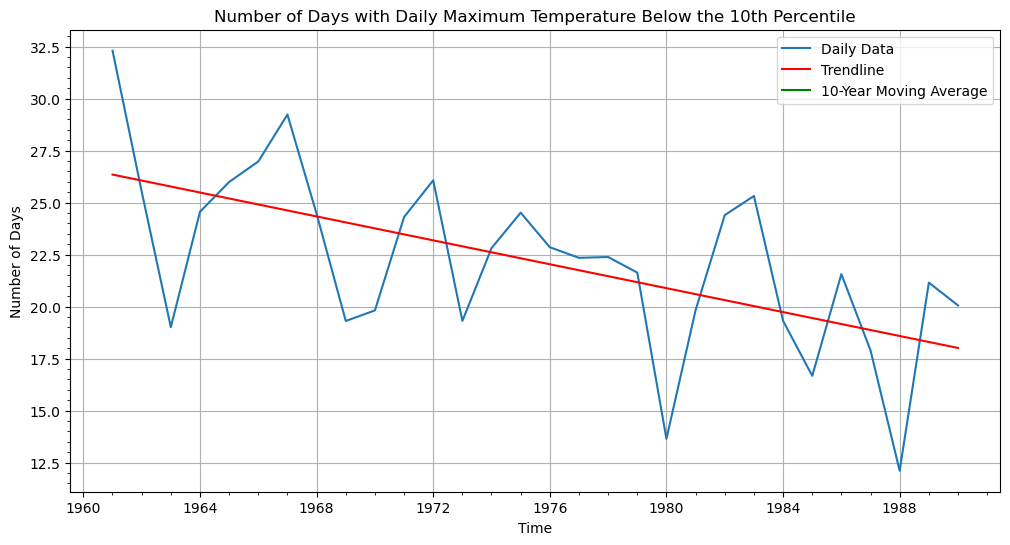

In [21]:
import numpy as np
import pandas as pd

# Assuming 'cold_days' is the variable containing the tx10p index
cold_days_mean = cold_days.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Convert to a pandas Series for easier manipulation
cold_days_series = cold_days_mean.to_series()

# Calculate a linear trendline
slope, intercept = np.polyfit(cold_days_series.index.year, cold_days_series.values, 1)
trendline = slope * cold_days_series.index.year + intercept

# Calculate a 10-year moving average
moving_average = cold_days_series.rolling(window=10*365, center=True).mean()  # Assuming daily data

# Plotting the time series, trendline, and moving average
plt.figure(figsize=(12, 6))
plt.plot(cold_days_series.index, cold_days_series.values, label='Daily Data')
plt.plot(cold_days_series.index, trendline, label='Trendline', color='red')
plt.plot(moving_average.index, moving_average.values, label='10-Year Moving Average', color='green')
plt.title('Number of Days with Daily Maximum Temperature Below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.show()


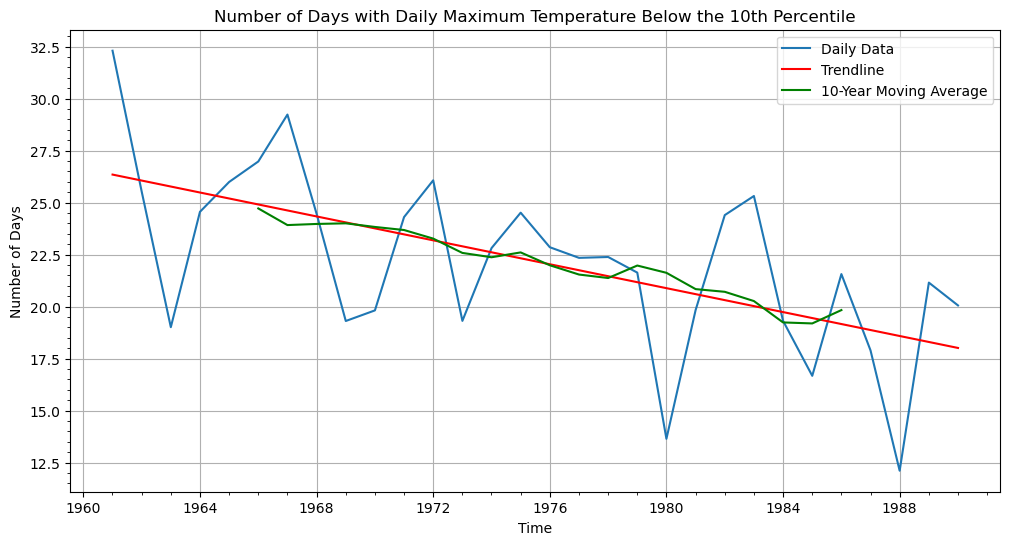

In [22]:
# Resample to annual data by taking the mean of each year
annual_data = cold_days_series.resample('AS').mean()

# Calculate a 10-year moving average of the annual data
moving_average = annual_data.rolling(window=10, center=True).mean()

# Plotting the time series, trendline, and moving average
plt.figure(figsize=(12, 6))
plt.plot(cold_days_series.index, cold_days_series.values, label='Daily Data')
plt.plot(cold_days_series.index, trendline, label='Trendline', color='red')
plt.plot(moving_average.index, moving_average.values, label='10-Year Moving Average', color='green')
plt.title('Number of Days with Daily Maximum Temperature Below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.show()
